In [4]:
import kagglehub

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


# Supervised Learning Approach (Random Forest + SMOTE)

Confusion Matrix:
 [[56852    12]
 [   17    81]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



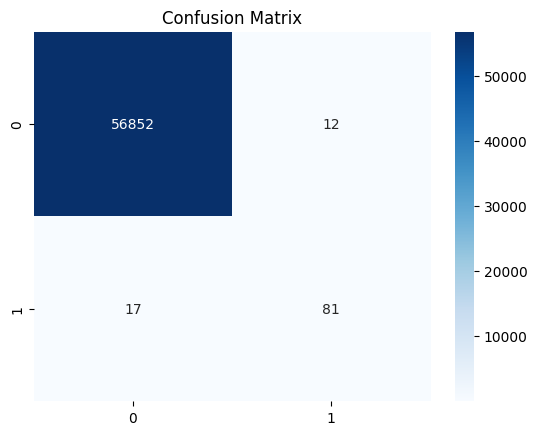

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(f"{path}/creditcard.csv")

X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

clf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


# Unsupervised Anomaly Detection (Isolation Forest)

Confusion Matrix:
 [[283949    366]
 [   366    126]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.26      0.26      0.26       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807

Precision‑Recall AUC: 0.137


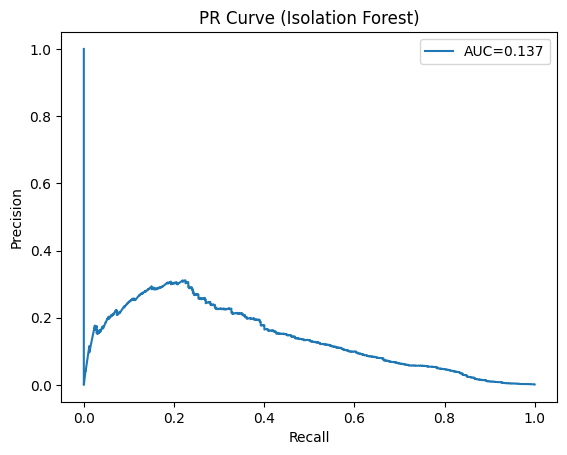

In [5]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_recall_curve, auc

X_scaled = scaler.fit_transform(X)
iso = IsolationForest(contamination=len(y[y==1])/len(y), random_state=42)
iso.fit(X_scaled)

anomaly_scores = iso.decision_function(X_scaled) * -1
y_pred_iso = iso.predict(X_scaled)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

print("Confusion Matrix:\n", confusion_matrix(y, y_pred_iso))
print("\nClassification Report:\n", classification_report(y, y_pred_iso))

precision, recall, _ = precision_recall_curve(y, anomaly_scores)
pr_auc = auc(recall, precision)
print(f"Precision‑Recall AUC: {pr_auc:.3f}")

plt.plot(recall, precision, label=f"AUC={pr_auc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve (Isolation Forest)")
plt.legend()
plt.show()
